In [381]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [382]:
#Data Exploration 

poke=pd.read_csv('pokemon.csv')
poke

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [383]:
poke.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [384]:
#Pre-Processing Data

poke['Legendary'] = poke['Legendary'].replace([True],1)
poke['Legendary'] = poke['Legendary'].replace([False],0)
poke

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,1
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,1
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,1
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,1


In [385]:
p = pd.get_dummies(poke,columns=['Type 1','Type 2'])
pn=p.drop(['Name','#'],axis=1)

In [386]:
pn.isnull().sum()

Total              0
HP                 0
Attack             0
Defense            0
Sp. Atk            0
Sp. Def            0
Speed              0
Generation         0
Legendary          0
Type 1_Bug         0
Type 1_Dark        0
Type 1_Dragon      0
Type 1_Electric    0
Type 1_Fairy       0
Type 1_Fighting    0
Type 1_Fire        0
Type 1_Flying      0
Type 1_Ghost       0
Type 1_Grass       0
Type 1_Ground      0
Type 1_Ice         0
Type 1_Normal      0
Type 1_Poison      0
Type 1_Psychic     0
Type 1_Rock        0
Type 1_Steel       0
Type 1_Water       0
Type 2_Bug         0
Type 2_Dark        0
Type 2_Dragon      0
Type 2_Electric    0
Type 2_Fairy       0
Type 2_Fighting    0
Type 2_Fire        0
Type 2_Flying      0
Type 2_Ghost       0
Type 2_Grass       0
Type 2_Ground      0
Type 2_Ice         0
Type 2_Normal      0
Type 2_Poison      0
Type 2_Psychic     0
Type 2_Rock        0
Type 2_Steel       0
Type 2_Water       0
dtype: int64

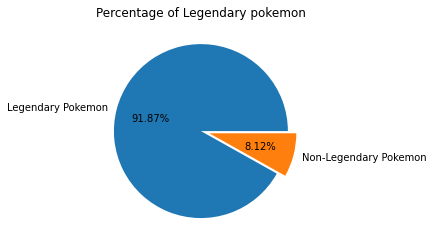

In [387]:
#Data Visualisation 

a=pn.loc[pn['Legendary']==0].count()[0]
b=pn.loc[pn['Legendary']==1].count()[0]

labels=['Legendary Pokemon','Non-Legendary Pokemon']
explode=[0,0.1]
plt.pie([a,b],autopct='%.2f%%',labels=labels,explode=explode)
plt.title('Percentage of Legendary pokemon')
plt.show()

In [388]:
#Train/Test Split

x=pn.drop(['Legendary'],axis=1)
y=pn['Legendary']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=0)

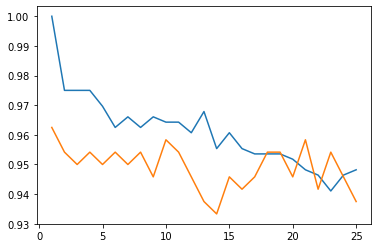

In [389]:
#Visualising KNN Model

training_acc=[]
testing_acc=[]
n_neighbors=np.arange(1,25)
for i in neighbors:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    training_acc.append(knn.score(X_train, y_train))
    testing_acc.append(knn.score(X_test, y_test)) 
plt.plot(neighbors, training_acc)
plt.plot(neighbors, testing_acc)
plt.show()

In [390]:
pn['Legendary'].nunique()

2

In [401]:
#Creating Pipeline

steps=([('scaler',StandardScaler()),('dt',DecisionTreeRegressor(random_state=0))])
pipeline=Pipeline(steps)
pipeline.fit(X_train,y_train)
pipeline.score(X_train,y_train)

1.0

In [402]:
pipeline.score(X_test,y_test)

0.8557403325986777

In [403]:
#Checking accuracy of the model

from sklearn.metrics import confusion_matrix,classification_report
y_pred = pipeline.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[215   2]
 [  1  22]]


In [404]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       217
           1       0.92      0.96      0.94        23

    accuracy                           0.99       240
   macro avg       0.96      0.97      0.96       240
weighted avg       0.99      0.99      0.99       240

